In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from typing import Any
import sys
import copy
import matplotlib.pyplot as plt
import itertools
from fractions import Fraction
from decimal import Decimal

from src.dataclass import (
    Input, Lattice, Parameter, Train, Save,
    Processed_Input, Topology, Conjugate, Result
)

from src.manage_data import Data
from src.manage_data import (
    filter_df, get_correlation_length, get_label, load_result, load_setting, delete_result)

from src.plot import log_fit, log_log_line

In [ ]:
setting = load_setting()

# setting[setting["size"] == 20]
# setting

In [ ]:
full_df = load_result("result") # load result from "result" or "temp" folder
full_df.columns.values

In [ ]:
# full_df

In [ ]:
full_df.size/full_df.columns.values.size

In [ ]:
# delete = df[(df["dimension"] == 3) & (df["size"] == 20)]
# np.array(delete["key"])

In [ ]:
# delete_result("temp", ["000000"])

In [ ]:
# delete_result("result", np.array(delete["key"])) # delete "key".pkl file in "result" or "temp" folder

In [ ]:
# df[(df["size"] == 8) & (df["Jv"] == 0.1)].sort_values("T", ascending=True)

In [11]:
state, dimension = (3, 3)

yt, yh, Tc = (Fraction(3,2), Fraction(5,2), 2.73)
print(yt, yh, Tc)

alpha, beta, gamma, delta, nu, eta = (
    2-dimension/yt,
    (dimension-yh)/yt,
    (2*yh-dimension)/yt,
    yh/(dimension-yh),
    1/yt,
    dimension-2*yh+2,
)

print(f"{yt=}, {yh=}, {Tc=}")
print(f"{alpha=}, {beta=}, {gamma=}, {delta=}, {nu=}, {eta=}")

#* Filter data at same universality class (identical state and dimension)
filtered_df = filter_df(full_df, state=state, dimension=dimension)
available_sizes = sorted(set(filtered_df["size"].values))
available_Jvs = sorted(set(filtered_df["Jv"].values))
print(available_sizes, available_Jvs)

# print(result[size_list.index(64),Jv_list.index(0.0)].order_parameter)

3/2 5/2 2.73
yt=Fraction(3, 2), yh=Fraction(5, 2), Tc=2.73
alpha=Fraction(0, 1), beta=Fraction(1, 3), gamma=Fraction(4, 3), delta=Fraction(5, 1), nu=Fraction(2, 3), eta=Fraction(0, 1)
[16, 20] [0.0]


In [12]:
filtered_df

,key,state,size,dimension,ghost,initial,T,H,Tc,Hc,...,binder_cumulant,spin_glass_order,spin_glass_suscept,spin_glass_binder,energy,specific_heat,irreducible_distance,correlation_function,autocorrelation,time
482,628d04,3,16,3,0,uniform,1.8808,0.0,2.7,0.0,...,0.666642,0.933256,0.072769,0.666616,-2.809121,0.568555,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.06674441273908371, 0.003126575033101986, 0....","[1.0, 0.9865059852600098, 0.9781932830810547, ...",113.217005
692,8b61fb,3,20,3,0,uniform,1.8808,0.0,2.7,0.0,...,0.666654,0.933246,0.142675,0.666615,-2.809092,0.569651,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.06675427380673683, 0.0031268893191718243, 0...","[1.0, 0.9865241699218742, 0.9784499511718755, ...",364.465700
618,7c7de6,3,20,3,0,uniform,1.9000,0.0,2.7,0.0,...,0.666653,0.929238,0.148521,0.666612,-2.798000,0.592589,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.07076207807126048, 0.003437836960471032, 0....","[1.0, 0.9860957031249993, 0.9777138671875002, ...",66.711492
1119,da82f6,3,16,3,0,uniform,1.9000,0.0,2.7,0.0,...,0.666640,0.929227,0.076221,0.666612,-2.797969,0.593040,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.07077337476572154, 0.0034385306939466176, 0...","[1.0, 0.9857721328735352, 0.9770832061767578, ...",114.486933
456,5dd9e7,3,16,3,0,uniform,2.0600,0.0,2.7,0.0,...,0.666615,0.887704,0.105557,0.666577,-2.684931,0.830561,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.11229639096232091, 0.007287035079365012, 0....","[1.0, 0.9790143966674805, 0.9655661582946777, ...",109.503365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,44d41a,3,16,3,0,uniform,3.3400,0.0,2.7,0.0,...,-0.000770,0.000093,0.000010,-0.958309,-0.557579,0.256790,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.9999073699249621, 0.1858182274627218, 0.059...","[1.0, 0.8712296485900879, 0.7590389251708984, ...",113.498527
923,b59fb3,3,20,3,0,uniform,3.3400,0.0,2.7,0.0,...,-0.000925,0.000093,0.000021,-0.996252,-0.557539,0.257050,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.9999072535227859, 0.18580480593530402, 0.05...","[1.0, 0.8717177734375002, 0.7603332519531251, ...",336.103820
1206,eb39dc,3,16,3,0,uniform,3.5000,0.0,2.7,0.0,...,0.000772,0.000083,0.000008,-0.985576,-0.520007,0.215220,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.9999169233382759, 0.17330160888200297, 0.05...","[1.0, 0.8528504371643066, 0.7226409912109375, ...",116.141296
580,738e93,3,20,3,0,uniform,3.5192,0.0,2.7,0.0,...,0.000287,0.000082,0.000015,-0.990189,-0.515910,0.211039,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.9999181080493801, 0.1719367461235706, 0.050...","[1.0, 0.8497414550781254, 0.7166713867187497, ...",374.126942


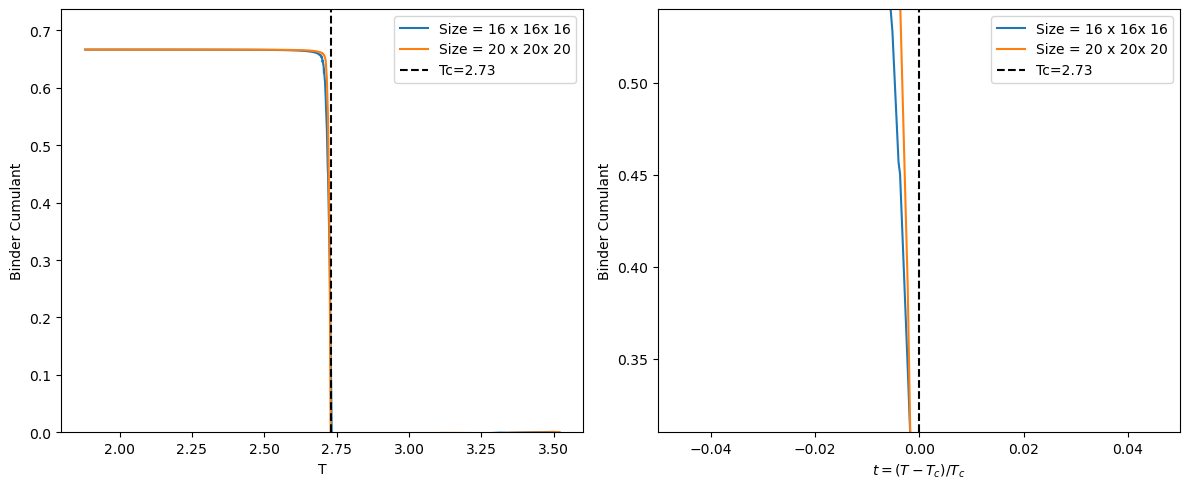

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Query
state, dimension, Jv = 3, 3, 0.0
filtered_df = filter_df(full_df, state=state, dimension=dimension, Jv=Jv)
available_sizes = sorted(set(filtered_df["size"].values))

# Main plot
for size in available_sizes:
    data = Data.from_df(filter_df(filtered_df, size=size))
    ax1.plot(data.temperature, data.binder_cumulant, label=get_label(data, "size"))
    ax2.plot((data.temperature - Tc) / Tc, data.binder_cumulant, label=get_label(data, "size"))

    x, y = data.temperature, data.binder_cumulant
    mask = y <= 1
    x, y = x[mask], y[mask]


# Additional lines
ax1.axvline(Tc, linestyle="--", color="k", label=f"Tc={Tc}")
ax2.axvline(0.0, linestyle="--", color="k", label=f"Tc={Tc}")

ax1.set_ylim([0, None])
ax1.legend()
ax1.set_xlabel("T")
ax1.set_ylabel("Binder Cumulant")
ax2.legend()
ax2.set_xlabel(r"$t=(T-T_c)/T_c$")
ax2.set_xlim([-0.05, 0.05])
ax2.set_ylim([0.31, 0.54])
ax2.set_ylabel("Binder Cumulant")

fig.tight_layout()

plt.show()

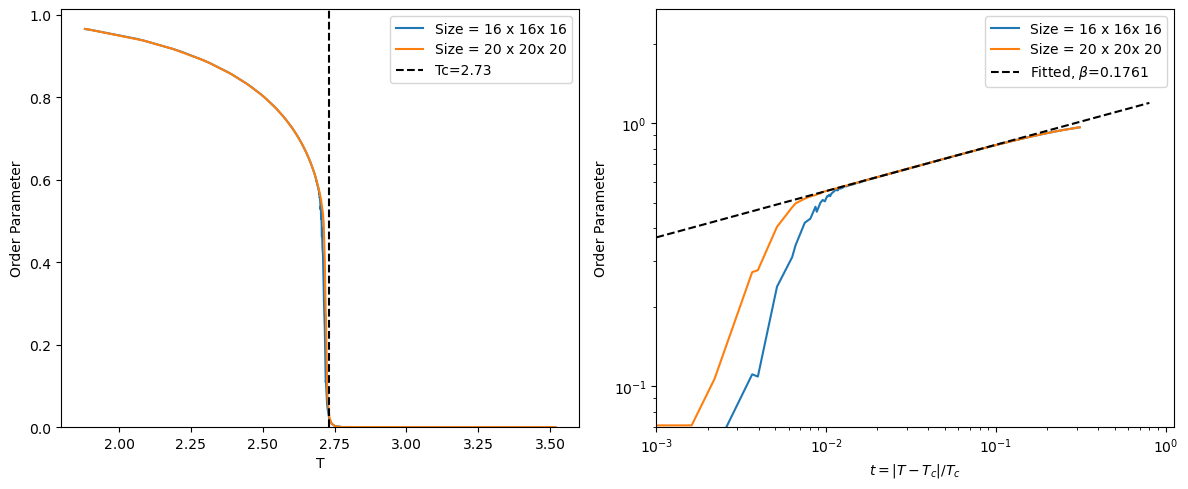

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Query
state, dimension, Jv = 3, 3, 0.0
filtered_df = filter_df(full_df, state=state, dimension=dimension, Jv=Jv)
available_sizes = sorted(set(filtered_df["size"].values))

for size in available_sizes:
    data = Data.from_df(filter_df(filtered_df, size=size))
    ax1.plot(data.temperature, data.order_parameter, label=get_label(data, "size"))
    ax2.plot((Tc-data.temperature) / Tc, data.order_parameter, label=get_label(data, "size"))

    # Fitting line at largest system size
    if size == max(available_sizes):
        x, y = (Tc-data.temperature) / Tc, data.order_parameter
        mask = (1e-2 < x) * (x < 1e-1)  # [False, False, ..... ,True, True, ...., False, False]
        fit_x, fit_y, slope, _ = log_fit(x[mask], y[mask], start=1e-3, end=8e-1)
        ax2.plot(fit_x, fit_y, "k--", label=fr"Fitted, $\beta$={slope:.4f}")

# Additional lines
ax1.axvline(Tc, linestyle="--", color="k", label=f"Tc={Tc}")

# # guide line
# x0, y0, slope, x1 = 1e-3, 5e-1, beta, 8e-1
# log_log_line(x0, y0, float(slope), x1, ax2, label=fr"FSS, $\beta$={float(beta):.4f}", color="k")

ax1.set_ylim([0, None])
ax1.legend()
ax1.set_xlabel("T")
ax1.set_ylabel("Order Parameter")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlabel(r"$t=|T-T_c|/T_c$")
ax2.set_ylabel("Order Parameter")
ax2.set_xlim([1.e-3, None])
ax2.set_ylim([7.e-2, None])

fig.tight_layout()

plt.show()

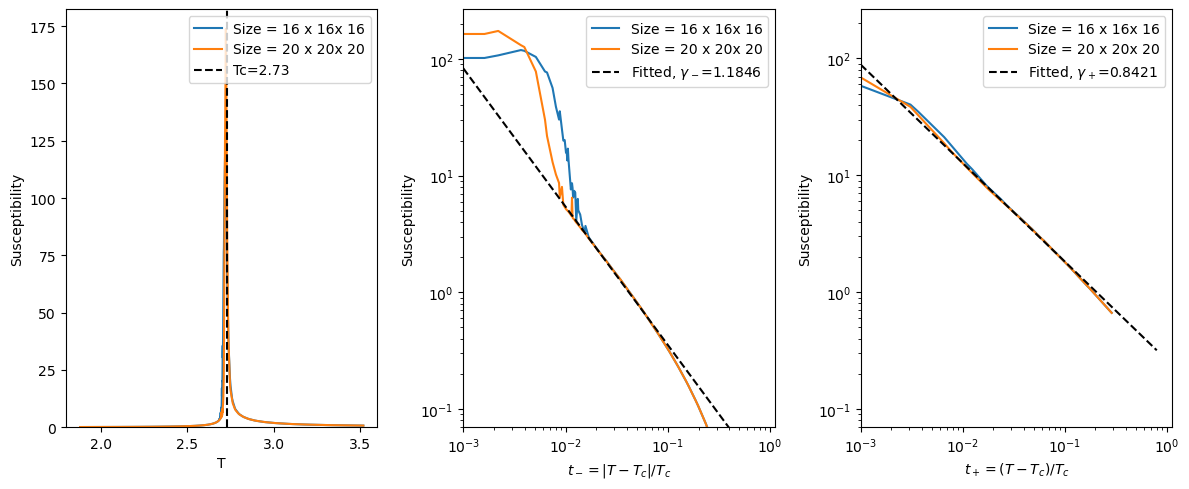

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

# Query
state, dimension, Jv = 3, 3, 0.0
filtered_df = filter_df(full_df, state=state, dimension=dimension, Jv=Jv)
available_sizes = sorted(set(filtered_df["size"].values))

for size in available_sizes:
    data = Data.from_df(filter_df(filtered_df, size=size))
    ax1.plot(data.temperature, data.susceptibility, label=get_label(data, "size"))
    ax2.plot((Tc-data.temperature) / Tc, data.susceptibility, label=get_label(data, "size"))
    ax3.plot((data.temperature-Tc) / Tc, data.susceptibility, label=get_label(data, "size"))

    # Fitting line at largest system size
    if size == max(available_sizes):
        x, y = (Tc-data.temperature) / Tc, data.susceptibility
        mask = (1e-2 < x) * (x < 1e-1)  # [False, False, ..... ,True, True, ...., False, False]
        fit_x, fit_y, slope, _ = log_fit(x[mask], y[mask], start=1e-3, end=8e-1)
        ax2.plot(fit_x, fit_y, "k--", label=fr"Fitted, $\gamma_-$={np.abs(slope):.4f}")
        
        x, y = (data.temperature-Tc) / Tc, data.susceptibility
        mask = (5*1e-3 < x) * (x < 1e-1)  # [False, False, ..... ,True, True, ...., False, False]
        fit_x, fit_y, slope, _ = log_fit(x[mask], y[mask], start=1e-3, end=8e-1)
        ax3.plot(fit_x, fit_y, "k--", label=fr"Fitted, $\gamma_+$={np.abs(slope):.4f}")        

# Additional lines
ax1.axvline(Tc, linestyle="--", color="k", label=f"Tc={Tc}")

# # guide line
# x0, y0, slope, x1 = 1e-3, 1e1, -gamma, 8e-1
# log_log_line(x0, y0, float(slope), x1, ax2, label=fr"FSS, $\gamma$={float(gamma):.4f}", color="k")
# x0, y0, slope, x1 = 1e-3, 1e1, -gamma, 8e-1
# log_log_line(x0, y0, float(slope), x1, ax3, label=fr"FSS, $\gamma$={float(gamma):.4f}", color="k")

ax1.set_ylim([0, None])
ax1.legend()
ax1.set_xlabel("T")
ax1.set_ylabel("Susceptibility")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlabel(r"$t_-=|T-T_c|/T_c$")
ax2.set_ylabel("Susceptibility")
ax2.set_xlim([1.e-3, None])
ax2.set_ylim([7.e-2, None])

ax3.legend()
ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.set_xlabel(r"$t_+=(T-T_c)/T_c$")
ax3.set_ylabel("Susceptibility")
ax3.set_xlim([1.e-3, None])
ax3.set_ylim([7.e-2, None])

fig.tight_layout()

plt.show()

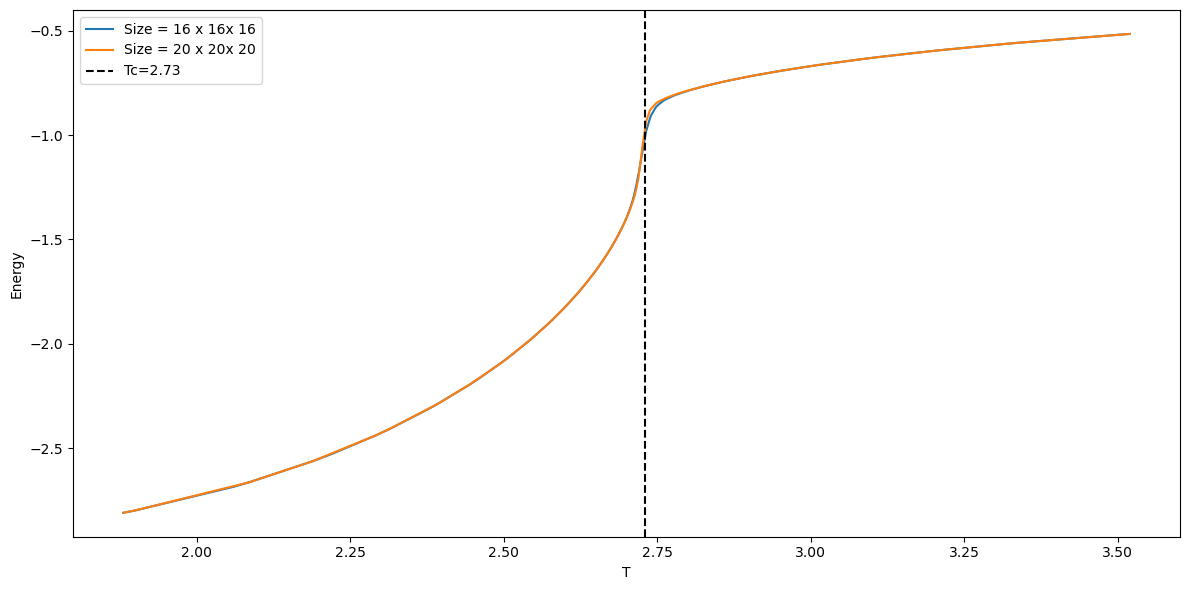

In [38]:
fig, ax = plt.subplots(ncols=1, figsize=(12, 6))

# Query
state, dimension, Jv = 3, 3, 0.0
filtered_df = filter_df(full_df, state=state, dimension=dimension, Jv=Jv)
available_sizes = sorted(set(filtered_df["size"].values))

for size in available_sizes:
    data = Data.from_df(filter_df(filtered_df, size=size))
    ax.plot(data.temperature, data.energy, label=get_label(data, "size"))

# Additional lines
ax.axvline(Tc, linestyle="--", color="k", label=f"Tc={Tc}")
# ax.set_ylim([0, None])
ax.legend()
ax.set_xlabel("T")
ax.set_ylabel("Energy")

fig.tight_layout()

plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Query
state, dimension, Jv = 3, 3, 0.0
filtered_df = filter_df(full_df, state=state, dimension=dimension, Jv=Jv)
available_sizes = sorted(set(filtered_df["size"].values))

for size in available_sizes:
    data = Data.from_df(filter_df(filtered_df, size=size))
    ax1.plot(data.temperature, data.specific_heat, label=get_label(data, "size"))
    ax2.plot((Tc-data.temperature) / Tc, data.specific_heat, label=get_label(data, "size"))

    # Fitting line at largest system size
    if size == max(available_sizes):
        x, y = (Tc-data.temperature) / Tc, data.specific_heat
        mask = (1e-2 < x) * (x < 1e-1)  # [False, False, ..... ,True, True, ...., False, False]
        fit_x, fit_y, slope, _ = log_fit(x[mask], y[mask], start=1e-3, end=8e-1)
        ax2.plot(fit_x, fit_y, "k--", label=fr"Fitted, $\beta$={slope:.4f}")

# Additional lines
ax1.axvline(Tc, linestyle="--", color="k", label=f"Tc={Tc}")

# # guide line
# x0, y0, slope, x1 = 1e-3, 5e-1, beta, 8e-1
# log_log_line(x0, y0, float(slope), x1, ax2, label=fr"FSS, $\beta$={float(beta):.4f}", color="k")

ax1.set_ylim([0, None])
ax1.legend()
ax1.set_xlabel("T")
ax1.set_ylabel("Order Parameter")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlabel(r"$t=|T-T_c|/T_c$")
ax2.set_ylabel("Order Parameter")
ax2.set_xlim([1.e-3, None])
ax2.set_ylim([7.e-2, None])

fig.tight_layout()

plt.show()

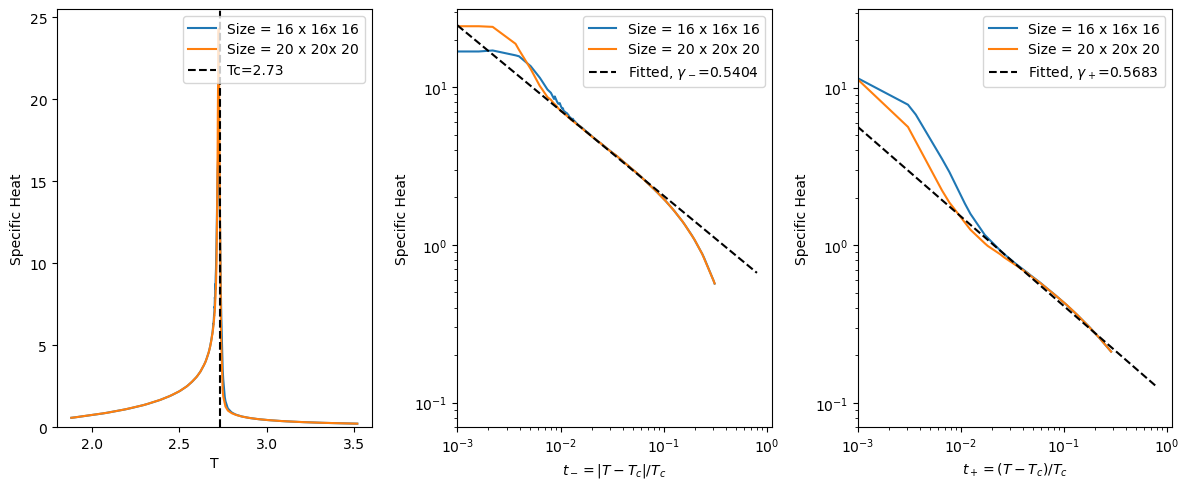

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

# Query
state, dimension, Jv = 3, 3, 0.0
filtered_df = filter_df(full_df, state=state, dimension=dimension, Jv=Jv)
available_sizes = sorted(set(filtered_df["size"].values))

for size in available_sizes:
    data = Data.from_df(filter_df(filtered_df, size=size))
    result = data.specific_heat
    
    ax1.plot(data.temperature, result, label=get_label(data, "size"))
    ax2.plot((Tc-data.temperature) / Tc, result, label=get_label(data, "size"))
    ax3.plot((data.temperature-Tc) / Tc, result, label=get_label(data, "size"))

    # Fitting line at largest system size
    if size == max(available_sizes):
        x, y = (Tc-data.temperature) / Tc, result
        mask = (1e-2 < x) * (x < 1e-1)  # [False, False, ..... ,True, True, ...., False, False]
        fit_x, fit_y, slope, _ = log_fit(x[mask], y[mask], start=1e-3, end=8e-1)
        ax2.plot(fit_x, fit_y, "k--", label=fr"Fitted, $\gamma_-$={np.abs(slope):.4f}")
        
        x, y = (data.temperature-Tc) / Tc, result
        mask = (5*1e-3 < x) * (x < 1e-1)  # [False, False, ..... ,True, True, ...., False, False]
        fit_x, fit_y, slope, _ = log_fit(x[mask], y[mask], start=1e-3, end=8e-1)
        ax3.plot(fit_x, fit_y, "k--", label=fr"Fitted, $\gamma_+$={np.abs(slope):.4f}")        

# Additional lines
ax1.axvline(Tc, linestyle="--", color="k", label=f"Tc={Tc}")

# # guide line
# x0, y0, slope, x1 = 1e-3, 1e1, -gamma, 8e-1
# log_log_line(x0, y0, float(slope), x1, ax2, label=fr"FSS, $\gamma$={float(gamma):.4f}", color="k")
# x0, y0, slope, x1 = 1e-3, 1e1, -gamma, 8e-1
# log_log_line(x0, y0, float(slope), x1, ax3, label=fr"FSS, $\gamma$={float(gamma):.4f}", color="k")

ax1.set_ylim([0, None])
ax1.legend()
ax1.set_xlabel("T")
ax1.set_ylabel("Specific Heat")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlabel(r"$t_-=|T-T_c|/T_c$")
ax2.set_ylabel("Specific Heat")
ax2.set_xlim([1.e-3, None])
ax2.set_ylim([7.e-2, None])

ax3.legend()
ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.set_xlabel(r"$t_+=(T-T_c)/T_c$")
ax3.set_ylabel("Specific Heat")
ax3.set_xlim([1.e-3, None])
ax3.set_ylim([7.e-2, None])

fig.tight_layout()

plt.show()

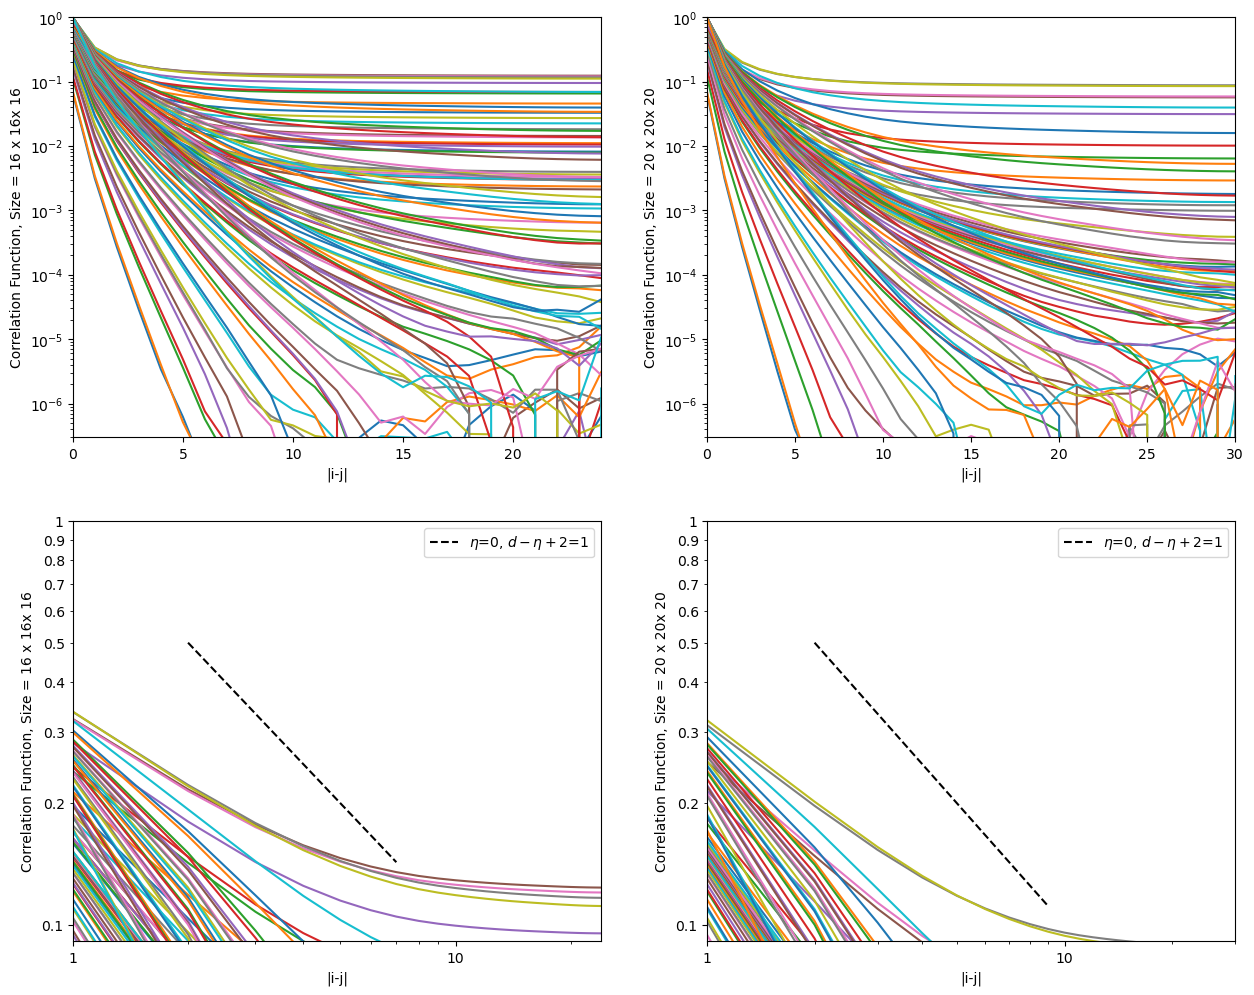

In [54]:
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda y, _: "{:.8g}".format(y))

# Query
state, dimension, Jv = 3, 3, 0.0
filtered_df = filter_df(full_df, state=state, dimension=dimension, Jv=Jv)
available_sizes = sorted(set(filtered_df["size"].values))

fig, ax = plt.subplots(nrows=2, ncols=np.size(available_sizes), figsize=(15, 12))

for i, size in enumerate(available_sizes):
    data = Data.from_df(filter_df(filtered_df, size=size))
    
    for j, irr_dist in enumerate(data.irreducible_distance):
        ax[0,i].plot(irr_dist, data.correlation_function[j])
        ax[1,i].plot(irr_dist, data.correlation_function[j])
    
    def g(x):
        return 1/x**(dimension-2+eta)
    x = np.arange(2,data.size/2)
    ax[1,i].plot(x,g(x),"--",color="k", label=fr"$\eta$={eta}, $d-\eta+2$={dimension-2+eta}")

    ax[0,i].set_yscale("log")
    ax[0,i].set_xlim(0, data.size*data.dimension/2)
    ax[0,i].set_ylim(3.e-7, 1.)
    ax[0,i].set_xlabel("|i-j|")
    ax[0,i].set_ylabel(f"Correlation Function, {get_label(data, 'size')}")
    
    ax[1,i].loglog()
    ax[1,i].set_xlim(1, data.size*data.dimension/2)
    ax[1,i].set_ylim(0.091, 1.)
    ax[1,i].legend(loc="best")
    ax[1,i].set_xlabel("|i-j|")
    ax[1,i].set_ylabel(f"Correlation Function, {get_label(data, 'size')}")
    
    ax[1,i].xaxis.set_major_formatter(formatter)
    # ax[1,i].xaxis.set_minor_formatter(formatter)
    ax[1,i].yaxis.set_major_formatter(formatter)
    ax[1,i].yaxis.set_minor_formatter(formatter)

# plt.legend()
plt.show()

In [ ]:
Jv = 0.0

for data in result[:, Jv_list.index(Jv)]:
    data.correlation_length = get_correlation_length(data)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

for data in result[size_list.index(16):size_list.index(20)+1, Jv_list.index(Jv)]:
    ax[0].plot(data.temperature, data.correlation_length, label=get_label(data, "size"))
    ax[1].plot((Tc-data.temperature)/Tc, data.correlation_length, label=get_label(data, "size"))
    ax[2].plot((data.temperature-Tc)/Tc, data.correlation_length, label=get_label(data, "size"))

ax[0].vlines(Tc, 0, 30, linestyle="--", color="k", label=f"Tc={Tc}")

def g(x):
    return x**(-nu)
x = np.linspace(0.0001, 1, 100)
ax[1].plot(x, g(x), "--", color="k", label = fr"$\nu$={nu}")
ax[2].plot(x, g(x), "--", color="k", label = fr"$\nu$={nu}")

ax[0].legend(loc="best")
ax[0].set_ylim([0, None])
ax[0].set_xlabel("T")
ax[0].set_ylabel("Correlation Length")

ax[1].legend(loc="best")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_xlabel(r"$t_-=|T-T_c|/T_c$")
ax[1].set_ylabel("Correlation Length")
ax[1].set_xlim([1.e-3, None])
ax[1].set_ylim([3.e-2, None])

ax[2].legend(loc="best")
ax[2].set_yscale("log")
ax[2].set_xscale("log")
ax[2].set_xlabel(r"$t_+=(T-T_c)/T_c$")
ax[2].set_ylabel("Correlation Length")
ax[2].set_xlim([1.e-3, None])
ax[2].set_ylim([3.e-2, None])

plt.legend()
plt.show()

In [ ]:
# x_min, x_max = (1, size/max(16/np.sqrt(size),8))

# measure_eta = []

# for i, distance_list in enumerate(np.array(corr["irreducible_distance"])):
#     correlation = np.array(corr["correlation_function"])[i]
#     x, y = [], []
#     for j, distance in enumerate(distance_list):
#         if(x_min <= distance <= x_max):
#             x.append(np.log(distance))
#             y.append(np.log(correlation[j]))
    
#     x, y = np.array(x).reshape((-1, 1)), np.array(y)
    
#     # print(x, y)
#     model = LinearRegression().fit(x, y)
#     measure_eta.append(2-dimension-model.coef_)

# measure_eta = np.average(measure_eta)

# print(f"measure eta = {measure_eta}")
# print(f"real eta: {eta}")

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

size = 16

for data in result[size_list.index(size), :]:
    ax[0].plot(data.temperature, data.binder_cumulant, label=get_label(data, "Jv"))
    ax[1].plot(data.temperature, data.spin_glass_binder, label=get_label(data, "Jv"))
    
ax[0].vlines(Tc, 0, 0.7, linestyle="--", color="k", label=f"Tc={Tc}")
# ax[1].vlines(0, 0, 0.7, linestyle="--", color="k", label=f"Tc={Tc}")

ax[0].set_ylim([0, None])
ax[0].legend(loc="best")
ax[0].set_xlabel("T")
ax[0].set_ylabel("Binder Cumulant")
ax[1].legend(loc="best")
ax[1].set_xlabel(r"$t=(T-T_c)/T_c$")
# ax[1].set_xlim([-0.05, 0.05])
# ax[1].set_ylim([0.31, 0.54])
ax[1].set_ylabel("Spin Glass Binder Cumulant")

plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

size = 16

for data in result[size_list.index(size), :]:
    ax[0].plot(data.temperature, data.order_parameter, label=get_label(data, "Jv"))
    ax[1].plot(data.temperature, data.spin_glass_order, label=get_label(data, "Jv"))

ax[0].vlines(Tc, 0, 1, linestyle="--", color="k", label=f"Tc={Tc}")

def g(x):
    return x**(beta)
x = np.linspace(0.0001, 1, 100)
# ax[1].plot(x, g(x), "--", color="k", label = fr"$\beta$={beta}")

ax[0].set_ylim([0, None])
ax[0].legend(loc="best")
ax[0].set_xlabel("T")
ax[0].set_ylabel("Order Parameter")

ax[1].legend(loc="best")
# ax[1].set_yscale("log")
# ax[1].set_xscale("log")
# ax[1].set_xlabel(r"$t=|T-T_c|/T_c$")
ax[1].set_xlabel("T")
ax[1].set_ylabel("Spin Glass Order Parameter")
# ax[1].set_xlim([1.e-3, None])
ax[1].set_ylim([0, None])

plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

size = 16

for data in result[size_list.index(size), :]:
    ax[0].plot(data.temperature, data.susceptibility, label=get_label(data, "Jv"))
    ax[1].plot(data.temperature, data.spin_glass_suscept, label=get_label(data, "Jv"))

ax[0].vlines(Tc, 0, 5, linestyle="--", color="k", label=f"Tc={Tc}")

def g(x):
    return x**(-gamma)
x = np.linspace(0.0001, 1, 10)
# ax[1].plot(x, g(x), "--", color="k", label = fr"$\gamma$={gamma}")
# ax[2].plot(x, g(x), "--", color="k", label = fr"$\gamma$={gamma}")

ax[0].set_ylim([0, None])
ax[0].legend(loc="best")
ax[0].set_xlabel("T")
ax[0].set_ylabel("Susceptibility")

ax[1].legend(loc="best")
# ax[1].set_yscale("log")
# ax[1].set_xscale("log")
ax[1].set_xlabel(r"$t_-=|T-T_c|/T_c$")
ax[1].set_ylabel("Spin Glass Susceptibility")
# ax[1].set_xlim([1.e-3, None])
ax[1].set_ylim([0.e-2, None])

plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

size = 16

for data in result[size_list.index(size), :]:
    ax.plot(data.temperature, data.energy, label=get_label(data, "Jv"))

ax.vlines(Tc, -2, -0.5, linestyle="--", color="k", label=f"Tc={Tc}")

# ax.set_ylim([-2, None])
ax.legend(loc="best")
ax.set_xlabel("T")
ax.set_ylabel("Energy")

plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

size = 16

for data in result[size_list.index(size), :]:
    ax.plot(data.temperature, data.specific_heat, label=get_label(data, "Jv"))

ax.vlines(Tc, 0, 5, linestyle="--", color="k", label=f"Tc={Tc}")


ax.set_ylim([0, None])
ax.legend(loc="best")
ax.set_xlabel("T")
ax.set_ylabel("Specific heat")

plt.show()